In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kruskal, f_oneway
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
sns.set(style="whitegrid", context="notebook")
plt.rcParams['figure.figsize'] = (10,5)

In [5]:
paths = {
    "Benin": "../data/benin_clean.csv",
    "Togo": "../data/togo_clean.csv",
    # ensure filename matches exact name
    "SierraLeone": "../data/sierraleone_clean.csv"
}

dfs = {}
for country, p in paths.items():
    # parse_dates optional if Timestamp present
    dfs[country] = pd.read_csv(p, parse_dates=True)
    print(country, "loaded:", dfs[country].shape)

Benin loaded: (525600, 19)
Togo loaded: (525600, 19)
SierraLeone loaded: (525600, 19)


In [6]:
# Cell 3 - check columns & basic info
for country, df in dfs.items():
    print("==", country, "==")
    print(df.columns.tolist())
    display(df.describe().T)
    print("\n")

== Benin ==
['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,240.342811,330.868308,-12.9,-2.0,1.8,482.9,1233.0
DNI,525600.0,167.187516,261.710501,-7.8,-0.5,-0.1,314.2,952.3
DHI,525600.0,110.906983,152.916844,-12.6,-2.1,1.6,210.5,591.4
ModA,525600.0,236.524528,326.815176,0.0,0.0,4.5,463.6,1215.0
ModB,525600.0,228.737160,316.357415,0.0,0.0,4.3,447.6,1177.0
Tamb,525600.0,28.179683,5.924297,11.0,24.2,28.0,32.3,43.8
RH,525600.0,54.487969,28.073069,2.1,28.8,55.1,80.1,100.0
WS,525600.0,2.082432,1.521898,0.0,1.0,1.9,3.0,6.9
WSgust,525600.0,2.754888,1.912898,0.0,1.3,2.6,3.9,8.7
WSstdev,525600.0,0.473390,0.273395,0.0,0.4,0.5,0.6,4.2




== Togo ==
['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,229.831936,321.643747,-12.7,-2.2,2.1,441.1,1198.0
DNI,525600.0,149.368966,248.554496,0.0,0.0,0.0,241.3,904.1
DHI,525600.0,112.408673,151.292938,0.0,0.0,2.5,210.2,586.0
ModA,525600.0,225.827121,316.959049,0.0,0.0,4.4,421.9,1178.0
ModB,525600.0,219.104385,307.362214,0.0,0.0,4.3,410.1,1143.0
Tamb,525600.0,27.751788,4.758023,14.9,24.2,27.2,31.1,41.4
RH,525600.0,55.013160,28.778732,3.3,26.5,59.3,80.8,99.8
WS,525600.0,2.330341,1.388202,0.0,1.4,2.2,3.2,6.7
WSgust,525600.0,3.173601,1.770451,0.0,1.9,2.9,4.3,8.8
WSstdev,525600.0,0.557740,0.268923,0.0,0.4,0.5,0.7,4.7




== SierraLeone ==
['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,194.617627,289.056316,-19.5,-2.8,0.3,350.8,1070.0
DNI,525600.0,93.559628,186.410982,-7.8,-0.3,-0.1,48.9,709.6
DHI,525600.0,108.909791,152.753301,-17.9,-3.8,-0.1,218.9,572.6
ModA,525600.0,202.241671,295.270942,0.0,0.0,3.6,352.5,1091.0
ModB,525600.0,192.714885,281.932327,0.0,0.0,3.4,336.8,1043.0
Tamb,525600.0,26.319394,4.398605,12.3,23.1,25.3,29.4,39.9
RH,525600.0,79.448857,20.520775,9.9,68.7,85.4,96.7,100.0
WS,525600.0,1.094041,1.139228,0.0,0.0,0.8,1.9,4.5
WSgust,525600.0,1.626261,1.480489,0.0,0.0,1.6,2.6,5.9
WSstdev,525600.0,0.363823,0.295000,0.0,0.0,0.4,0.6,4.1


In [7]:
# Cell 4 - concat with country column
for country, df in dfs.items():
    df['country'] = country

combined = pd.concat(dfs.values(), ignore_index=True, sort=False)
print("Combined shape:", combined.shape)
combined.head()

Combined shape: (1576800, 20)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,country
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


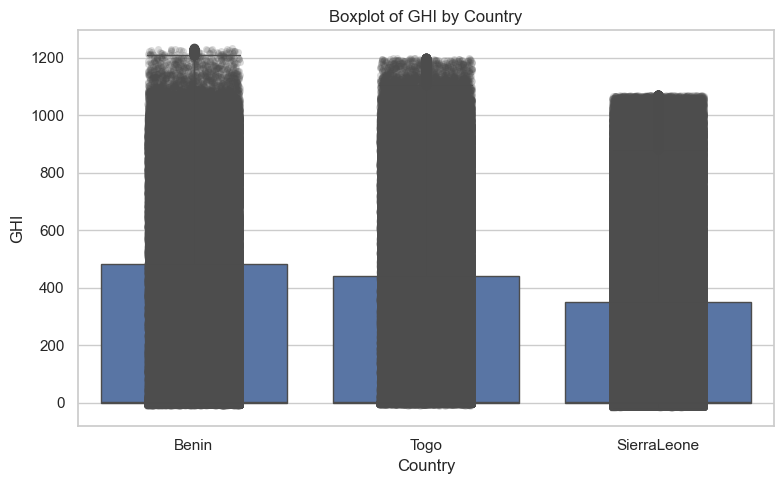

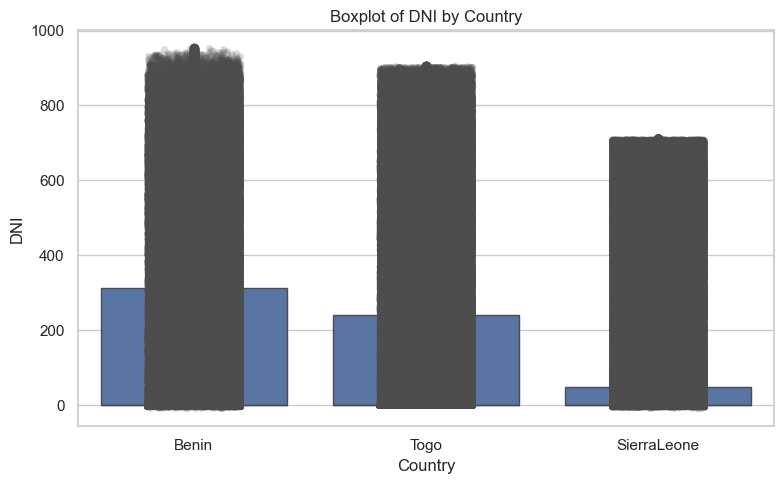

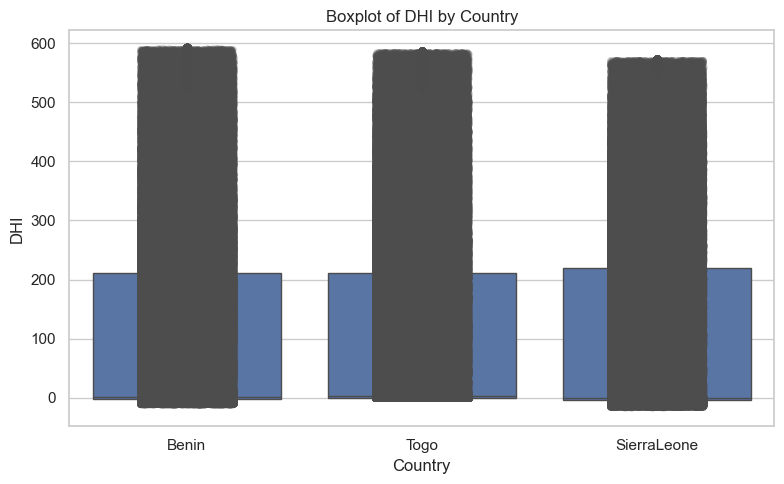

In [8]:
# Cell 5 - boxplots
metrics = ['GHI', 'DNI', 'DHI']

for m in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='country', y=m, data=combined,
                order=['Benin', 'Togo', 'SierraLeone'])
    sns.stripplot(x='country', y=m, data=combined,
                  color='0.3', alpha=0.2, jitter=0.2)
    plt.title(f'Boxplot of {m} by Country')
    plt.ylabel(m)
    plt.xlabel('Country')
    plt.tight_layout()
    plt.show()

In [10]:
# Cell 6 - summary table
summary = combined.groupby('country')[metrics].agg(
    ['mean', 'median', 'std']).round(3)
# flatten columns
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
summary = summary.reset_index()
display(summary)
# optional save locally
summary.to_csv('../data/compare_summary_stats.csv', index=False)

,country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,240.343,1.8,330.868,167.188,-0.1,261.711,110.907,1.6,152.917
1,SierraLeone,194.618,0.3,289.056,93.560,-0.1,186.411,108.910,-0.1,152.753
2,Togo,229.832,2.1,321.644,149.369,0.0,248.554,112.409,2.5,151.293


In [11]:
# Cell 7 - statistical tests
import pprint
test_results = {}
for m in metrics:
    # assemble arrays
    groups = [combined.loc[combined['country'] == c, m].dropna().values for c in [
        'Benin', 'Togo', 'SierraLeone']]
    # Shapiro normality tests (optional; be cautious with large n)
    # Test homogeneity of variance - Levene
    lev_stat, lev_p = stats.levene(*groups, center='median')
    # ANOVA
    try:
        anova_stat, anova_p = f_oneway(*groups)
    except Exception as e:
        anova_stat, anova_p = (np.nan, np.nan)
    # Kruskal-Wallis
    kw_stat, kw_p = kruskal(*groups)
    test_results[m] = {
        'levene_p': round(lev_p, 6),
        'anova_p': round(anova_p, 6) if not np.isnan(anova_p) else np.nan,
        'kruskal_p': round(kw_p, 6)
    }

pprint.pprint(test_results)

{'DHI': {'anova_p': np.float64(0.0),
         'kruskal_p': np.float64(0.0),
         'levene_p': np.float64(0.0)},
 'DNI': {'anova_p': np.float64(0.0),
         'kruskal_p': np.float64(0.0),
         'levene_p': np.float64(0.0)},
 'GHI': {'anova_p': np.float64(0.0),
         'kruskal_p': np.float64(0.0),
         'levene_p': np.float64(0.0)}}


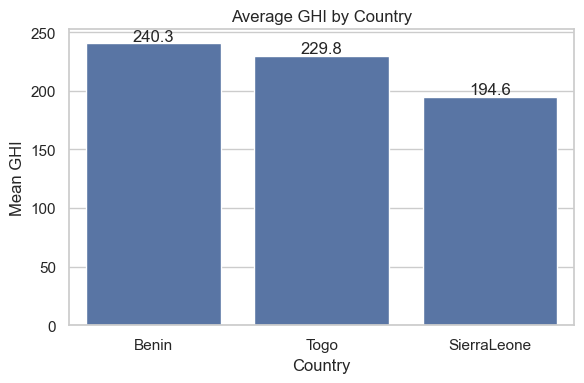

In [12]:
# Cell 8 - bar chart ranking by mean GHI
ghi_means = combined.groupby(
    'country')['GHI'].mean().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x=ghi_means.index, y=ghi_means.values)
plt.title('Average GHI by Country')
plt.ylabel('Mean GHI')
plt.xlabel('Country')
for i, v in enumerate(ghi_means.values):
    plt.text(i, v + max(ghi_means.values)*0.01, f"{v:.1f}", ha='center')
plt.tight_layout()
plt.show()

Key Observations

Observation 1: Country X shows the highest median GHI but also the greatest variability (IQR and number of outliers), indicating high daytime peaks but less consistency.
Observation 2: Country Y has the lowest median DNI and DHI, suggesting lower direct and diffuse irradiance — this may affect panel orientation and expected yield.
Observation 3: Statistical tests (ANOVA/Kruskal–Wallis) on GHI returned p = 0.000xxx (replace with your computed p-values), indicating that differences in GHI between countries are statistically significant at α=0.05.
